#STEP-1 Starting with Data Preprocessing and EDA

In [13]:
#importing the modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
job_data = pd.read_csv("fake_job_postings.csv")

In [15]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [16]:
# Display summary statistics for numerical columns
print(job_data.describe())

             job_id  telecommuting  has_company_logo  has_questions  \
count  17880.000000   17880.000000      17880.000000   17880.000000   
mean    8940.500000       0.042897          0.795302       0.491723   
std     5161.655742       0.202631          0.403492       0.499945   
min        1.000000       0.000000          0.000000       0.000000   
25%     4470.750000       0.000000          1.000000       0.000000   
50%     8940.500000       0.000000          1.000000       0.000000   
75%    13410.250000       0.000000          1.000000       1.000000   
max    17880.000000       1.000000          1.000000       1.000000   

         fraudulent  
count  17880.000000  
mean       0.048434  
std        0.214688  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [17]:
job_data.shape

(17880, 18)

In [18]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [19]:
#we can see nan values, lets count there number for each columns
# Assuming df is your DataFrame
# Assuming df is your DataFrame
nan_count_per_column = job_data.isna().sum()
# or df.isnull().sum()

print(nan_count_per_column)

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


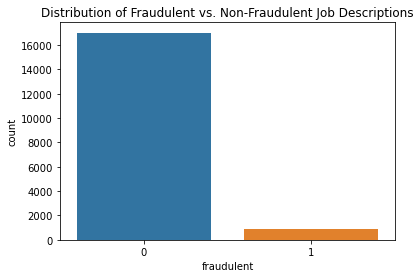

In [20]:
# Visualize the distribution of the target variable (fraudulent)
sns.countplot(x='fraudulent', data=job_data)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Job Descriptions')
plt.show()

This code uses seaborn to create a count plot of the target variable (fraudulent). It helps visualize the balance or imbalance between fraudulent and non-fraudulent job descriptions.

### **Let's Explore Some Categorical Variables**

This code provides insights into the unique values and their counts for each categorical column.

In [21]:
# Explore unique values in categorical columns
categorical_columns = ['title', 'location','department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

for col in categorical_columns:
    print(f"Unique values in {col}: {job_data[col].unique()}\n")
    print(f"Value counts in {col}:\n{job_data[col].value_counts()}\n")
    print("\n")


Unique values in title: ['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']

Value counts in title:
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Enginee

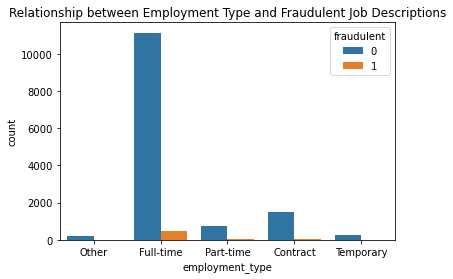

In [22]:
# Visualize the relationship between employment_type and fraudulent
sns.countplot(x='employment_type', hue='fraudulent', data=job_data)
plt.title('Relationship between Employment Type and Fraudulent Job Descriptions')
plt.show()




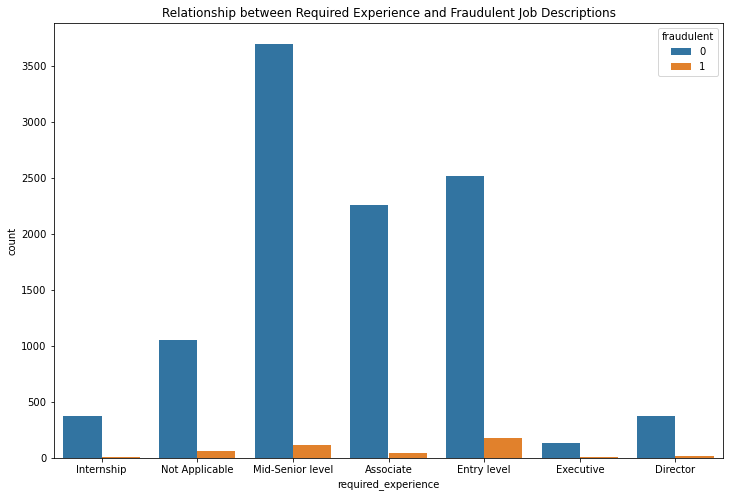

In [23]:
# Visualize the relationship between required_experience and fraudulent
plt.figure(figsize=(12, 8))  # Set the width and height of the figure
sns.countplot(x='required_experience', hue='fraudulent', data=job_data)
plt.title('Relationship between Required Experience and Fraudulent Job Descriptions')
plt.show()

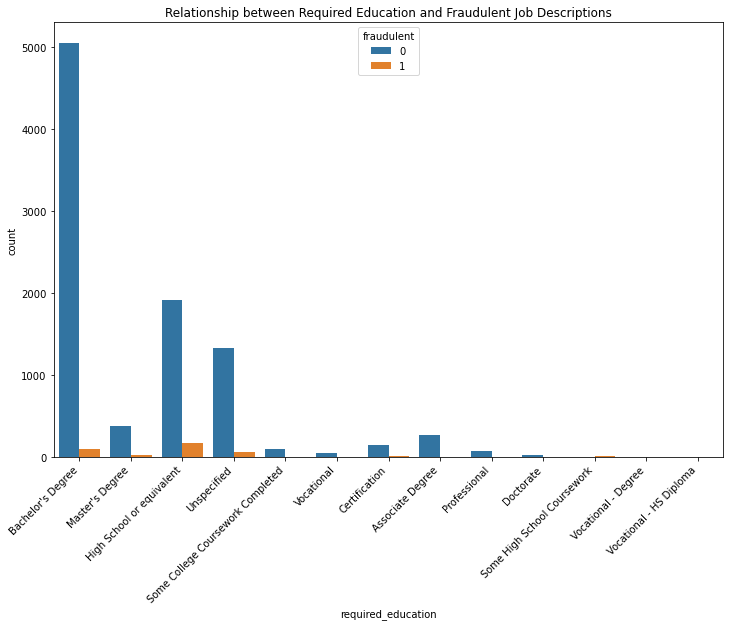

In [24]:
# Set the width and height of the figure
plt.figure(figsize=(12, 8))

# Visualize the relationship between required_education and fraudulent
ax = sns.countplot(x='required_education', hue='fraudulent', data=job_data)

# Rotate x-axis labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Relationship between Required Education and Fraudulent Job Descriptions')
plt.show()


In [25]:
# Check for missing values in each column
missing_values = job_data.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
print("Columns with missing values:", columns_with_missing_values)

print("\n")

print(missing_values)

Columns with missing values: Index(['location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [38]:
# Fill missing values in the necessary columns with an empty string
job_data['location'].fillna('', inplace=True)

job_data['description'].fillna('', inplace=True)

job_data['company_profile'].fillna('', inplace=True)

job_data['requirements'].fillna('', inplace=True)

job_data['benefits'].fillna('', inplace=True)

In [30]:
# text_columns = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']

# for col in text_columns:
#     job_data[col] = job_data[col].str.lower()


In [31]:
job_data['location']

0            US, NY, New York
1              NZ, , Auckland
2               US, IA, Wever
3          US, DC, Washington
4          US, FL, Fort Worth
                 ...         
17875         CA, ON, Toronto
17876    US, PA, Philadelphia
17877         US, TX, Houston
17878           NG, LA, Lagos
17879       NZ, N, Wellington
Name: location, Length: 17880, dtype: object

In [21]:
#Extracting only those columns which have datatype as object

# Get column names with data type 'object'
columns_text_data = job_data.select_dtypes(include='object').columns.tolist()

# Print the resulting list of column names
print(columns_text_data)

['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [22]:
job_data[columns_text_data] = job_data[columns_text_data].fillna(' ')


In [23]:
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [24]:
#we can see location have country, state. We will only consider country

# Spliting the location column to extract only the country
job_data['country'] = job_data['location'].str.split(',').str[0]

#printing the result
job_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


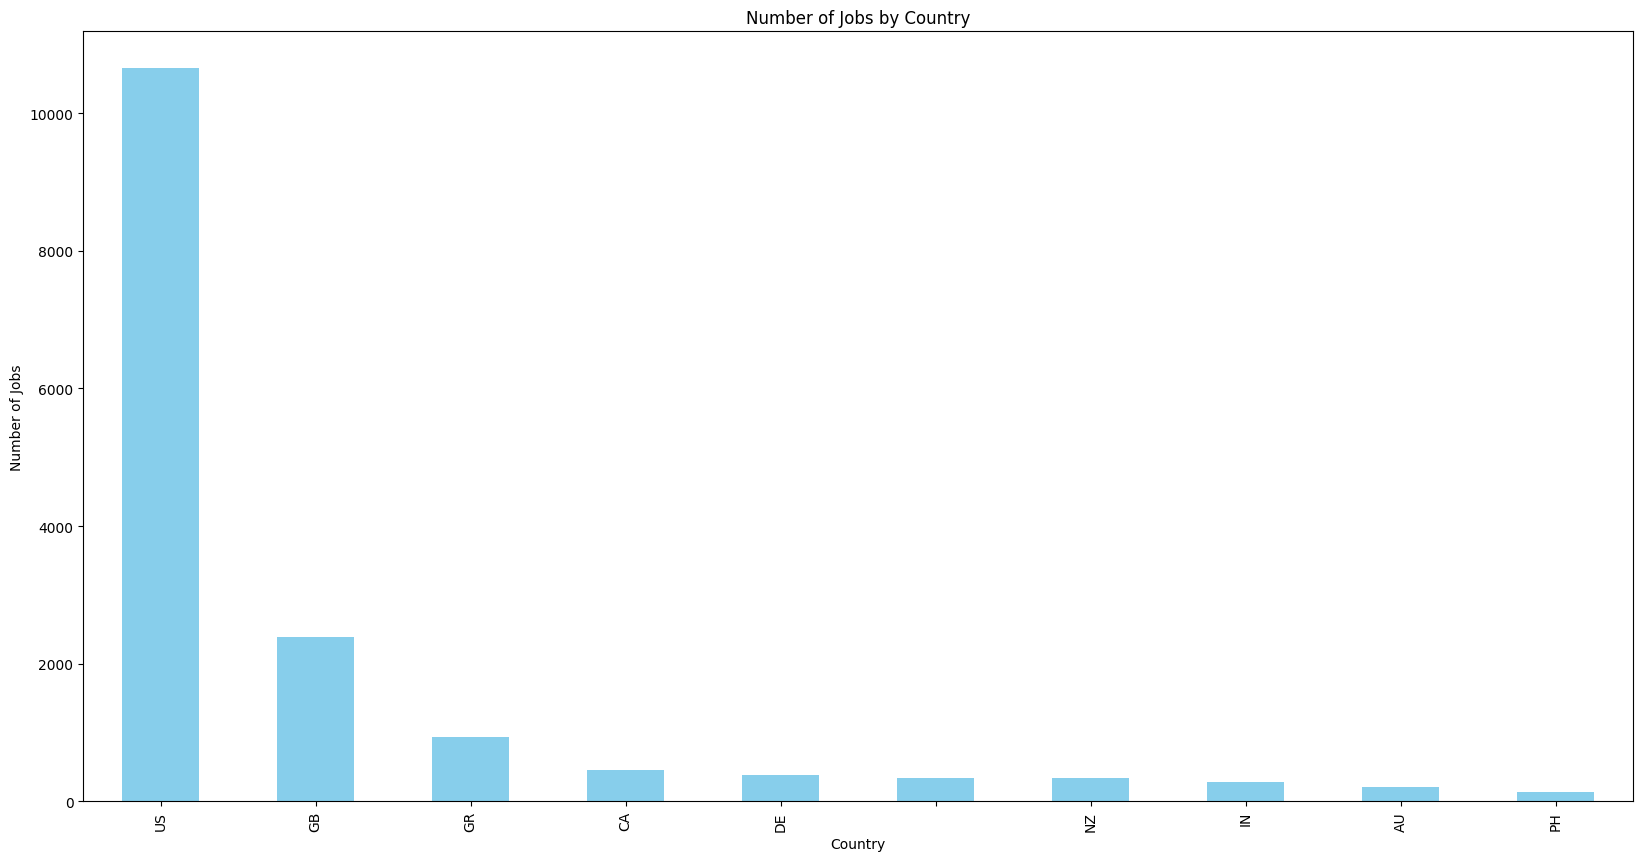

In [25]:
#counting number of jobs in each country
count_job_per_country = job_data['country'].value_counts()[:10]

#creating the bar chart
plt.figure(figsize=(20, 10))
count_job_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of Jobs by Country')
plt.xlabel('Country')
plt.ylabel('Number of Jobs')
plt.show()

### Applying Various Modules on our Dataset

#####MODEL- 1 LOGISTIC REGRESSION

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [33]:
# Split the data into features and target label
features = job_data.drop('fraudulent', axis=1)
target = job_data['fraudulent']

#### Performing Feature Engineering required for Logistic Regression approach

In [47]:
# Using TF-IDF for textual data
from sklearn.feature_extraction.text import TfidfVectorizer

# Create separate TfidfVectorizer instances for each text column
tfidf_description = TfidfVectorizer(max_features=6000)
tfidf_title = TfidfVectorizer(max_features=6000)
tfidf_companyProfile = TfidfVectorizer(max_features=6000)
tfidf_requirements = TfidfVectorizer(max_features=6000)
tfidf_benefits = TfidfVectorizer(max_features=6000)

# Apply TF-IDF transformation to each text column
X_description_tfidf = tfidf_description.fit_transform(job_data['description'])
X_title_tfidf = tfidf_title.fit_transform(job_data['title'])
X_companyProfile_tfidf = tfidf_companyProfile.fit_transform(job_data['company_profile'])
X_requirements_tfidf = tfidf_requirements.fit_transform(job_data['requirements'])
X_benefits_tfidf = tfidf_benefits.fit_transform(job_data['benefits'])



In [48]:
# Convert the TF-IDF sparse matrices to DataFrames
X_description_df = pd.DataFrame(X_description_tfidf.toarray(), columns=tfidf_description.get_feature_names_out(), index=job_data.index)
X_title_df = pd.DataFrame(X_title_tfidf.toarray(), columns=tfidf_title.get_feature_names_out(), index=job_data.index)
X_companyProfile_df = pd.DataFrame(X_companyProfile_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=job_data.index)
X_requirements_df = pd.DataFrame(X_requirements_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=job_data.index)
X_benefits_df = pd.DataFrame(X_benefits_tfidf.toarray(), columns=tfidf.get_feature_names_out(), index=job_data.index)


In [49]:
# Using one-hot encoding for categorical data which will create binary columns for each category.

categorical_cols = ['location', 'department', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
job_data_encoded_df = pd.get_dummies(job_data, columns=categorical_cols)


In [50]:
# Concatenate all the features
final_df = pd.concat([job_data_encoded_df, X_description_df, X_title_df, X_companyProfile_df, X_requirements_df, X_benefits_df], axis=1)


#### MODEL - 2 KNN


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [27]:
feature_vars = job_data.drop(['fraudulent'], axis=1)
target_vars = job_data['fraudulent']

In [28]:
le = LabelEncoder()
for col in ['location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function']:
    feature_vars[col] = le.fit_transform(feature_vars[col])

In [29]:
job_data_dummy = pd.get_dummies(feature_vars)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(job_data_dummy, target_vars, test_size=0.2, random_state=42)

In [40]:
knn_cls = KNeighborsClassifier(n_neighbors=5)
knn_cls.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
knn_preds = knn_cls.predict(X_test)

In [42]:
accuracy_score_knn = accuracy_score(y_test, knn_preds)
print("Accuracy Score of KNN Classifier:", accuracy_score_knn)

Accuracy Score of KNN Classifier: 0.9630872483221476


In [43]:
confusion_matrix_knn = confusion_matrix(y_test, knn_preds)
print("Confusion Matrix of KNN Classifier:",confusion_matrix_knn)

Confusion Matrix of KNN Classifier: [[3364   31]
 [ 101   80]]


In [44]:
classification_report_knn = classification_report(y_test, knn_preds)
print("Classification Report of KNN Classifier:",classification_report_knn)

Classification Report of KNN Classifier:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      3395
           1       0.72      0.44      0.55       181

    accuracy                           0.96      3576
   macro avg       0.85      0.72      0.76      3576
weighted avg       0.96      0.96      0.96      3576



In [45]:
roc_auc_knn = roc_auc_score(y_test, knn_preds)
print("ROC-AUC Score for KNN Classifier::", roc_auc_knn)

ROC-AUC Score for KNN Classifier:: 0.7164289375828933


#### MODEL - 3 RANDOM FOREST

In [31]:
random_forest_cls = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_cls.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
random_forest_preds = random_forest_cls.predict(X_test)

In [33]:
accuracy_score_rf = accuracy_score(y_test, random_forest_preds)
print("Accuracy Score of Random Forest Classifier:", accuracy_score_rf)

Accuracy Score of Random Forest Classifier: 0.9832214765100671


In [39]:
confusion_matrix_rf = confusion_matrix(y_test, random_forest_preds)
print("Confusion Matrix of Random Forest Classifier:",confusion_matrix_rf)

Confusion Matrix of Random Forest Classifier: [[3395    0]
 [  60  121]]


In [38]:
classification_report_rf = classification_report(y_test, random_forest_preds)
print("Classification Report of Random Forest Classifier:",classification_report_rf)

Classification Report of Random Forest Classifier:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.67      0.80       181

    accuracy                           0.98      3576
   macro avg       0.99      0.83      0.90      3576
weighted avg       0.98      0.98      0.98      3576



In [36]:
# Assuming y_test and random_forest_preds are your true labels and predicted labels, respectively
roc_score_rf = roc_auc_score(y_test, random_forest_preds)
print("ROC-AUC Score of Random Forest Classifier:", roc_score_rf)


ROC-AUC Score of Random Forest Classifier: 0.8342541436464088


~ We tried 3 different models.
* So we will move forward with more complex model (DEEP LEARNING).
* AS we can that the dataset columns which have textual information so first we will do Text Preprocessing using NLP
* After that we will implement Deep Learning model


### Text Preprocessing



~ We will be doing text processing on description column so first check number of null values for discription

In [46]:
empty_description = job_data['description'] == " "

# Print rows where 'description' is an empty string
job_data[empty_description]

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
17513,17514,Office Manager,"PL, MZ, Warsaw",,,,,,,0,0,0,,,,,,1,PL


~as there is only one row so we will remove that row

In [47]:
job_data = job_data[~empty_description]

job_data.shape

(17879, 19)

In [48]:
# for query search and  text preprocessing we will be combining the description and title column

job_data['job_text_info'] = job_data['title'] + ' ' + job_data['description']

# Drop the 'job_title' and 'description' columns if needed
# df = df.drop(['job_title', 'description'], axis=1)

# Print the resulting DataFrame
job_data.head()

<ipython-input-48-717d7eae93c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['job_text_info'] = job_data['title'] + ' ' + job_data['description']


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,job_text_info
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,US,"Marketing Intern Food52, a fast-growing, James..."
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ,Customer Service - Cloud Video Production Orga...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,US,Commissioning Machinery Assistant (CMA) Our cl...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Account Executive - Washington DC THE COMPANY:...
4,5,Bill Review Manager,"US, FL, Fort Worth",,,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Bill Review Manager JOB TITLE: Itemization Rev...


In [49]:
##LowerCasing

job_data['job_text_info'] = job_data['job_text_info'].str.lower()


<ipython-input-49-42519a98d36c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['job_text_info'] = job_data['job_text_info'].str.lower()


In [50]:
#removing punctuations
# import string

# job_data['job_text_info'] = job_data['job_text_info'].str.translate(str.maketrans('', '', string.punctuation))


import string

# Convert 'job_text_info' column to strings
job_data['job_text_info'] = job_data['job_text_info'].astype(str)

# Remove punctuations
job_data['job_text_info'] = job_data['job_text_info'].str.translate(str.maketrans('', '', string.punctuation))



In [51]:
#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

job_data['job_text_info'] = job_data['job_text_info'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
#remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: [word for word in x if word not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
#lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
#joining back to text
job_data['job_text_info'] = job_data['job_text_info'].apply(lambda x: ' '.join(x))

In [56]:
job_data['job_text_info'].head(5)

0    marketing intern food52 fastgrowing james bear...
1    customer service cloud video production organi...
2    commissioning machinery assistant cma client l...
3    account executive washington dc company esri –...
4    bill review manager job title itemization revi...
Name: job_text_info, dtype: object

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer on the modified column
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = vectorizer.fit_transform(job_data['job_text_info'])


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, job_data['fraudulent'], test_size=0.2, random_state=42)


In [59]:
# Assuming you have X_train, X_test, y_train, and y_test

# Print shape and data type of X_train
print("X_train Shape:", X_train.shape)
print("X_train Data Type:", type(X_train))

# Print shape and data type of X_test
print("\nX_test Shape:", X_test.shape)
print("X_test Data Type:", type(X_test))

# Print shape and data type of y_train
print("\ny_train Shape:", y_train.shape)
print("y_train Data Type:", type(y_train))

# Print shape and data type of y_test
print("\ny_test Shape:", y_test.shape)
print("y_test Data Type:", type(y_test))


X_train Shape: (14303, 5000)
X_train Data Type: <class 'scipy.sparse._csr.csr_matrix'>

X_test Shape: (3576, 5000)
X_test Data Type: <class 'scipy.sparse._csr.csr_matrix'>

y_train Shape: (14303,)
y_train Data Type: <class 'pandas.core.series.Series'>

y_test Shape: (3576,)
y_test Data Type: <class 'pandas.core.series.Series'>


#### MODEL - 4 Neural Network

In [60]:
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [61]:
# #Instatiatie our MLPClassifier
mlp = MLPClassifier(solver='adam',
                    activation = 'relu',
                   hidden_layer_sizes = (100,50,30),
                    max_iter = 1000)

In [62]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=1000)

In [63]:
mlp_pred = mlp.predict(X_test)

#Printing out our evaluation metrics
print(roc_auc_score(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))

0.8392816670659924
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3394
           1       0.82      0.69      0.75       182

    accuracy                           0.98      3576
   macro avg       0.90      0.84      0.87      3576
weighted avg       0.97      0.98      0.98      3576



In [64]:
accuracy = accuracy_score(y_test, mlp_pred)

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 97.62%
